# 1 Data Loading

In [1]:
# Import data
!rm -rf NYC-property-sale-data-analysis
! git clone https://github.com/Auazure/NYC-property-sale-data-analysis.git 

Cloning into 'NYC-property-sale-data-analysis'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # for plot normal distribution
from scipy.stats import zscore # outlier

In [3]:
# Load data
bronx2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_bronx.csv",thousands=',')
brooklyn2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_brooklyn.csv",thousands=',')
manhattan2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_manhattan.csv",thousands=',')
queens2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_queens.csv",thousands=',')
statenisland2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_statenisland.csv",thousands=',')

bronx2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_bronx.csv",thousands=',')
brooklyn2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_brooklyn.csv",thousands=',')
manhattan2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_manhattan.csv",thousands=',')
queens2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_queens.csv",thousands=',')
statenisland2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_statenisland.csv",thousands=',')

# Merge data
NYC = pd.concat([manhattan2018, manhattan2019,bronx2018, bronx2019, 
                 queens2018, brooklyn2018, statenisland2018,queens2018, 
                 brooklyn2019, statenisland2019], ignore_index=True)
NYC.columns = [c.replace('\n', '') for c in NYC.columns]
NYC.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,CA$0,5/23/18
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,"CA$4,844,809",5/22/18
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,NaN,10009.0,1.0,0.0,1.0,1883.0,5200.0,1900.0,1,A4,"CA$6,100,000",12/3/18
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,NaN,10009.0,2.0,0.0,2.0,1218.0,4764.0,1899.0,1,B1,CA$0,4/25/18
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,CA$0,11/29/18
5,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,CA$0,11/29/18
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,NaN,C7,133 AVENUE D,NaN,10009.0,20.0,2.0,22.0,3481.0,14588.0,1930.0,2,C7,"CA$8,300,000",12/10/18
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,NaN,C7,21-23 AVENUE B,NaN,10009.0,12.0,4.0,16.0,4186.0,10588.0,1900.0,2,C7,"CA$10,350,000",9/7/18
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,NaN,C1,200 EAST 7TH STREET,NaN,10009.0,18.0,0.0,18.0,2271.0,10650.0,1910.0,2,C1,"CA$5,000,000",9/5/18
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,390,50,NaN,C1,"209 EAST 7TH STREET, 1W",NaN,10009.0,29.0,0.0,29.0,3900.0,18099.0,1900.0,2,C1,CA$0,11/30/18


In [4]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167719 entries, 0 to 167718
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   BOROUGH                                167719 non-null  int64  
 1   NEIGHBORHOOD                           167719 non-null  object 
 2   BUILDING CLASS CATEGORY                167719 non-null  object 
 3   TAX CLASS AS OF FINAL ROLL 18/19       167439 non-null  object 
 4   BLOCK                                  167719 non-null  int64  
 5   LOT                                    167719 non-null  int64  
 6   EASE-MENT                              0 non-null       float64
 7   BUILDING CLASS AS OF FINAL ROLL 18/19  167439 non-null  object 
 8   ADDRESS                                167719 non-null  object 
 9   APARTMENT NUMBER                       36979 non-null   object 
 10  ZIP CODE                               167710 non-null  

#2 Data Cleaning and Preprocessing 

###2.1 Duplicates

In [5]:
#Delete the duplicates and check that it worked
NYC = NYC.drop_duplicates(NYC.columns, keep='last')
sum(NYC.duplicated(NYC.columns))

0

###2.2 Uniqueness

In [6]:
#check the number of unique value in each column
for i in NYC.columns:
  print(str(i) + " " + str(NYC[i].nunique()))

BOROUGH 5
NEIGHBORHOOD 253
BUILDING CLASS CATEGORY 46
TAX CLASS AS OF FINAL ROLL 18/19 10
BLOCK 11967
LOT 3415
EASE-MENT 0
BUILDING CLASS AS OF FINAL ROLL 18/19 176
ADDRESS 122104
APARTMENT NUMBER 5877
ZIP CODE 186
RESIDENTIAL UNITS 201
COMMERCIAL UNITS 91
TOTAL UNITS 223
LAND SQUARE FEET 8371
GROSS SQUARE FEET 8186
YEAR BUILT 180
TAX CLASS AT TIME OF SALE 3
BUILDING CLASS AT TIME OF SALE 175
SALE PRICE 16801
SALE DATE 728


###2.3 Data type transformation

Notice that there is no information in EASE-MENT columns, hence we will initally drop it. Also in this project, we won't consider the effect of time on the sale price, hence we will drop the SALE DATE.

In [7]:
#Let's convert some of the columns to appropriate datatype
categorical_data = ['BOROUGH','TAX CLASS AT TIME OF SALE','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AS OF FINAL ROLL 18/19',
                    'BUILDING CLASS AT TIME OF SALE']
for each in categorical_data:
    NYC[each] = NYC[each].astype('category')
NYC['LAND SQUARE FEET'] = pd.to_numeric(NYC['LAND SQUARE FEET'], errors='coerce')
NYC['GROSS SQUARE FEET']= pd.to_numeric(NYC['GROSS SQUARE FEET'], errors='coerce')
NYC['SALE PRICE'] = NYC['SALE PRICE'].replace('[CA\$,]', '', regex=True).astype(float) * 0.77 # convert to US dollars 
NYC = NYC.drop(columns=["SALE DATE", "EASE-MENT"])
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140596 entries, 0 to 167718
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   BOROUGH                                140596 non-null  category
 1   NEIGHBORHOOD                           140596 non-null  object  
 2   BUILDING CLASS CATEGORY                140596 non-null  category
 3   TAX CLASS AS OF FINAL ROLL 18/19       140352 non-null  object  
 4   BLOCK                                  140596 non-null  int64   
 5   LOT                                    140596 non-null  int64   
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  140352 non-null  category
 7   ADDRESS                                140596 non-null  object  
 8   APARTMENT NUMBER                       33637 non-null   object  
 9   ZIP CODE                               140587 non-null  float64 
 10  RESIDENTIAL UNITS                      12834

###2.4 Missing value

In [8]:
# Drop YEAR BUILT = 0, LAND SQUARE FEET = 0, GROSS SQUARE FEET = 0   
NYC = NYC[NYC['YEAR BUILT'] > 0]
NYC = NYC[NYC['LAND SQUARE FEET'] > 0]
NYC = NYC[NYC['GROSS SQUARE FEET'] > 0]  
# Drop missing values
NYC.dropna(how='all',axis=1,inplace=True)
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81030 entries, 0 to 167714
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   BOROUGH                                81030 non-null  category
 1   NEIGHBORHOOD                           81030 non-null  object  
 2   BUILDING CLASS CATEGORY                81030 non-null  category
 3   TAX CLASS AS OF FINAL ROLL 18/19       81030 non-null  object  
 4   BLOCK                                  81030 non-null  int64   
 5   LOT                                    81030 non-null  int64   
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  81030 non-null  category
 7   ADDRESS                                81030 non-null  object  
 8   APARTMENT NUMBER                       7154 non-null   object  
 9   ZIP CODE                               81030 non-null  float64 
 10  RESIDENTIAL UNITS                      81030 non-null  fl

In [9]:
#Check if dropping nan worked
NYC.isnull().sum()

BOROUGH                                      0
NEIGHBORHOOD                                 0
BUILDING CLASS CATEGORY                      0
TAX CLASS AS OF FINAL ROLL 18/19             0
BLOCK                                        0
LOT                                          0
BUILDING CLASS AS OF FINAL ROLL 18/19        0
ADDRESS                                      0
APARTMENT NUMBER                         73876
ZIP CODE                                     0
RESIDENTIAL UNITS                            0
COMMERCIAL UNITS                             0
TOTAL UNITS                                  0
LAND SQUARE FEET                             0
GROSS SQUARE FEET                            0
YEAR BUILT                                   0
TAX CLASS AT TIME OF SALE                    0
BUILDING CLASS AT TIME OF SALE               0
SALE PRICE                                   0
dtype: int64

###2.5 Outliers

Z score is an important measurement that tells how many Standard deviation above or below a number is from the mean of the dataset. Here we will use zscore to detect the outliers in column SALE PRICE, LAND SQUARE FEET and LAND GROSS FEET. Here We set the theshold = 3

In [10]:
NYC['sale_price_zscore']=zscore(NYC['SALE PRICE'])
NYC.loc[NYC['sale_price_zscore'].abs()<=3]
print("Number of outliers in SALE PRICE is: {}".format(len((np.where(zscore(NYC['SALE PRICE']) > 3)[0]))))

NYC['land_square_zscore']=zscore(NYC['LAND SQUARE FEET'])
NYC.loc[NYC['land_square_zscore'].abs()<=3]
print("Number of outliers in LAND SQUARE FEET is: {}".format(len((np.where(zscore(NYC['LAND SQUARE FEET']) > 3)[0]))))

NYC['gross_square_zscore']=zscore(NYC['GROSS SQUARE FEET'])
NYC.loc[NYC['gross_square_zscore'].abs()<=3]
print("Number of outliers in GROSS SQUARE FEET is: {}".format(len((np.where(zscore(NYC['GROSS SQUARE FEET']) > 3)[0]))))

Number of outliers in SALE PRICE is: 214
Number of outliers in LAND SQUARE FEET is: 138
Number of outliers in GROSS SQUARE FEET is: 467


# 3 Exploratory Data Analysis

## 3.1 Target variable (Sale price)

###3.1.1 Raw data visualization

In [11]:
NYC['SALE PRICE'].describe()

count    8.103000e+04
mean     1.010502e+06
std      1.137783e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.465000e+05
75%      6.289907e+05
max      1.846076e+09
Name: SALE PRICE, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 77.843288


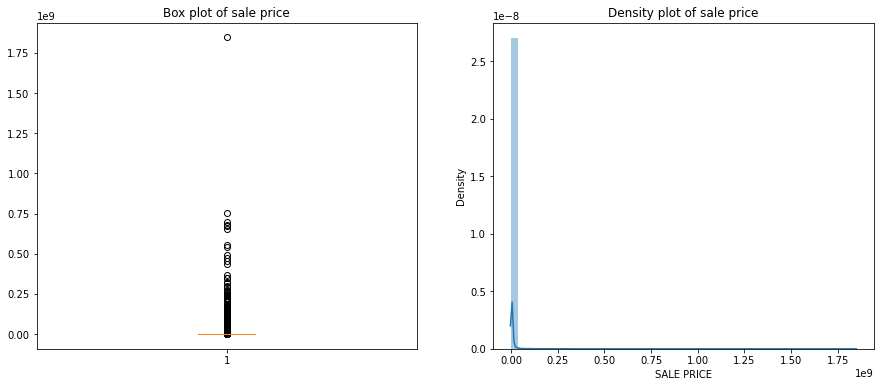

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(NYC['SALE PRICE'])
plt.title('Box plot of sale price')
plt.subplot(1,2,2)
sns.distplot(NYC['SALE PRICE'])
plt.title('Density plot of sale price')
# Skewness
print("Skewness: %f" % NYC['SALE PRICE'].skew())
plt.show()

###3.1.2 Range set-up and Log transformation

In [13]:
# Percentage of sale price = $0
len(NYC.loc[NYC['SALE PRICE'] == 0 ])/len(NYC)

0.36029865481920276

In [14]:
# Percentage of sale price < $50000
len(NYC.loc[NYC['SALE PRICE'] < 50000])/len(NYC)

0.38799210169073184

In [15]:
# Percentage of sale price < 2000000
len(NYC.loc[NYC['SALE PRICE'] > 12000000 ])/len(NYC)

0.008663457978526471

Many sales occur with a nonsensically small number: $\$0$ most commonly ($36\%$ of the sale price = $\$0$). Based on the information from the original data resource, these sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement. In order to deal with it, we will setup a reasonable range for the sale price. Here we will remove the instances that the sale price is less than $\$50000$ and greater than $\$12$M (Notice that the $\$2$M threshold helps eliminate the special cases). After then we will perform log transformation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


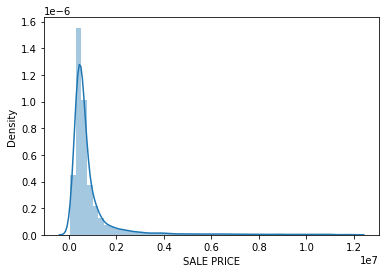

In [16]:
NYC = NYC[(NYC['SALE PRICE'] > 50000) & (NYC['SALE PRICE'] < 12000000)]
sns.distplot(NYC['SALE PRICE'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box plot of sale price')

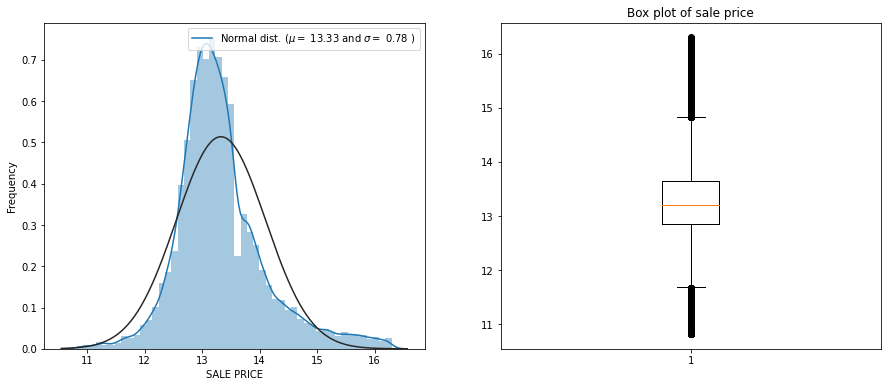

In [17]:
# log(x) transform
NYC["SALE PRICE"]=np.log(NYC["SALE PRICE"])

plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(NYC["SALE PRICE"], fit = stats.norm)
plt.ylabel('Frequency')
(mu, sigma) = stats.norm.fit(NYC["SALE PRICE"])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.subplot(1,2,2)
plt.boxplot(NYC['SALE PRICE'])
plt.title('Box plot of sale price')

##3.2 Feature Analysis and Feature selection

In [18]:
NYC = NYC.drop(['sale_price_zscore', 'land_square_zscore', 'gross_square_zscore'],axis =1)
NYC.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE'],
      dtype='object')

###3.2.1 Correlation

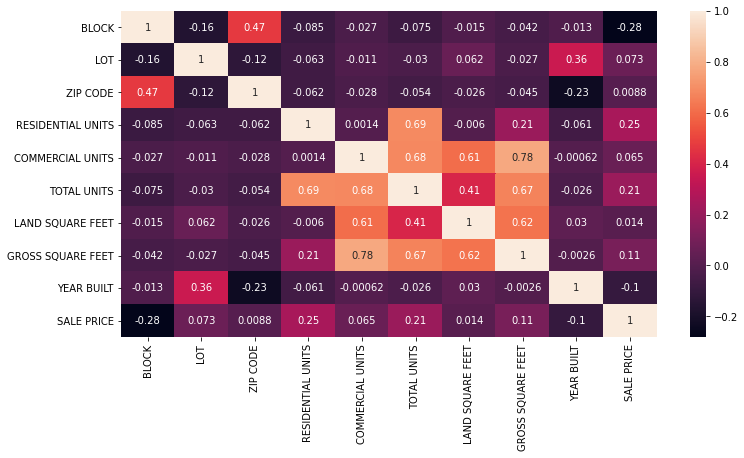

In [19]:
# Colinearity heatmap
corr = NYC.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

###3.2.2 Feature Analysis and Selection

####Borough

**Description**: The name of the borough in which the property is located.

1 = Manhattan\
2 = Bronx\
3 = Brooklyn\
4 = Queens\
5 = Staten Island

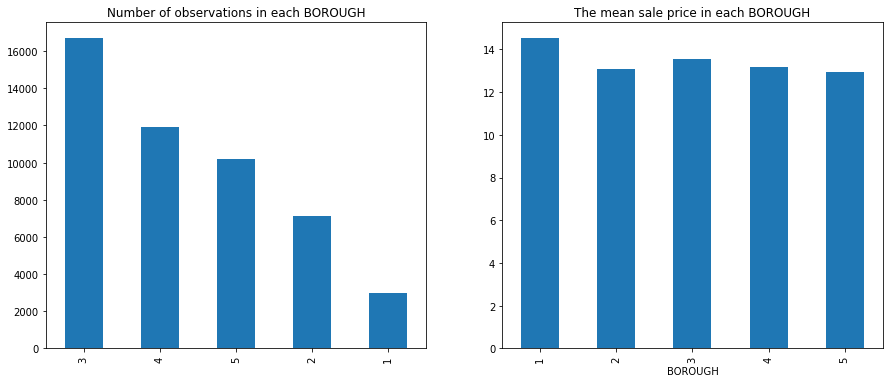

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Number of observations in each BOROUGH")
NYC['BOROUGH'].value_counts().plot(kind='bar')

# Average price by borough
plt.subplot(1,2,2)
plt.title("The mean sale price in each BOROUGH")
NYC.groupby('BOROUGH').mean()['SALE PRICE'].plot(kind = 'bar')

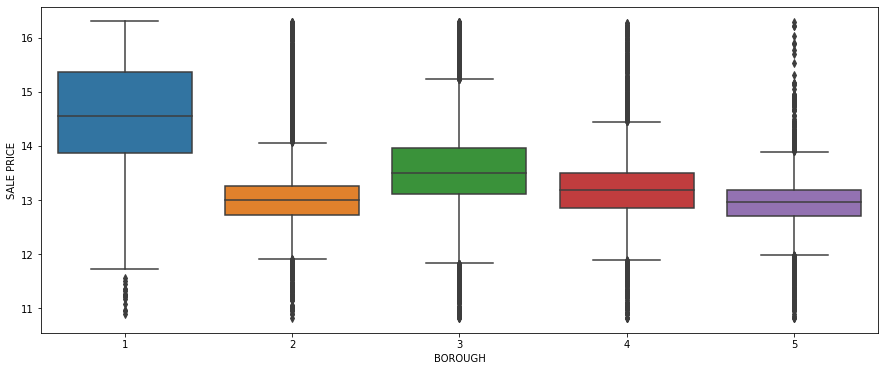

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(x=NYC['BOROUGH'].astype('category'), y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

####Neighborhood

**Description:** Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included.

Text(0, 0.5, 'Average sale price')

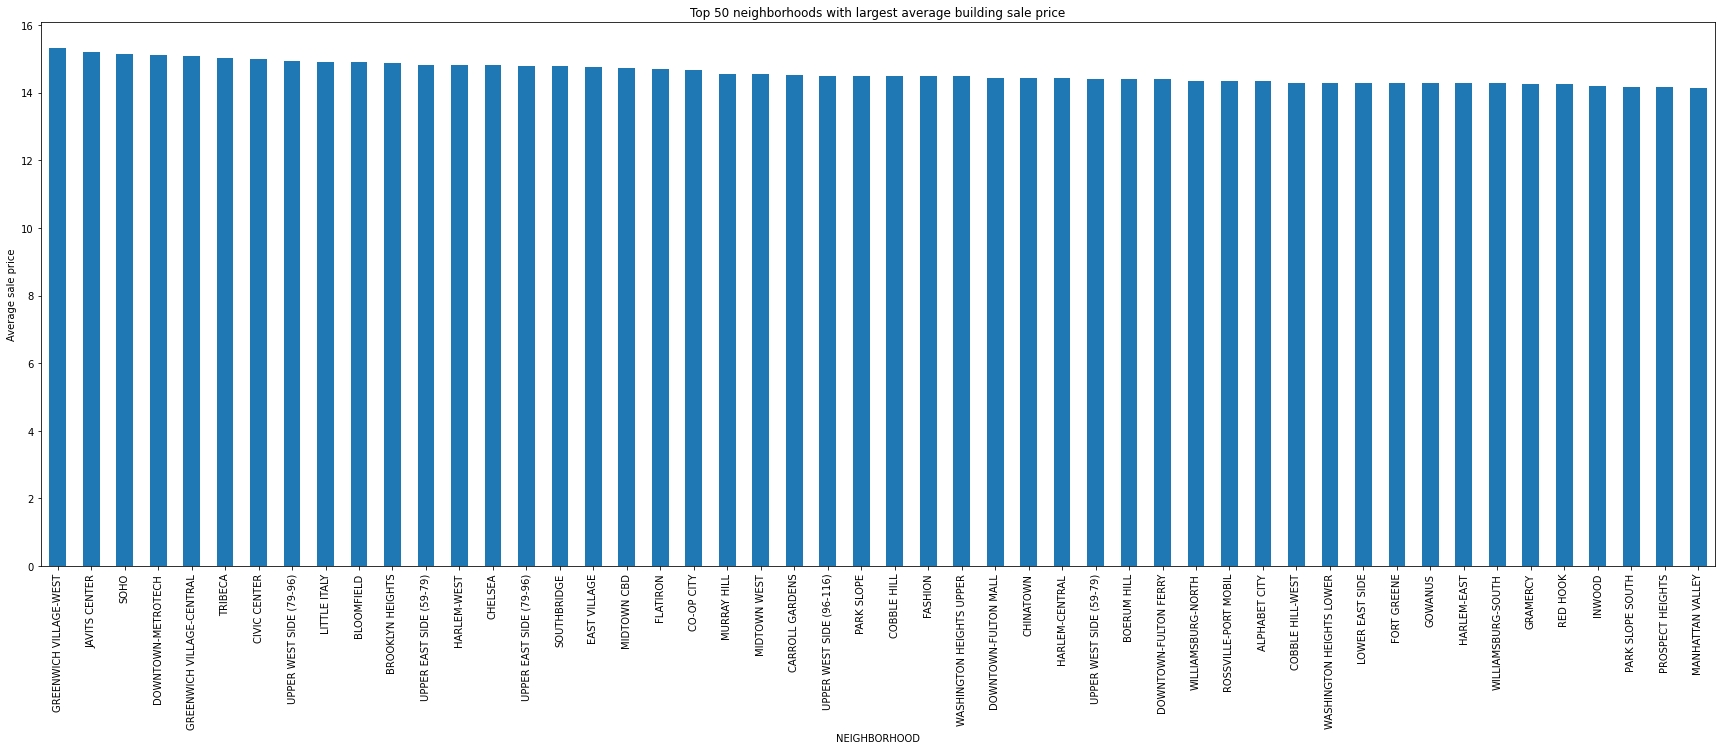

In [22]:
# Top 50 neighborhoods with largest average building sale price
plt.figure(figsize=(30,10))
NYC.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].sort_values(ascending = False).head(50).plot(kind = 'bar')
plt.title("Top 50 neighborhoods with largest average building sale price")
plt.ylabel('Average sale price')

####Building Class Category

**Description:** This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot.

In [23]:
NYC['BUILDING CLASS CATEGORY'].unique()

['01 ONE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS', '08 RENTALS - ELEVATOR APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS', '14 RENTALS - 4-10 UNIT', ..., '31 COMMERCIAL VACANT LAND', '36 OUTDOOR RECREATIONAL FACILITIES', '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT', '06 TAX CLASS 1 - OTHER', '39 TRANSPORTATION FACILITIES']
Length: 36
Categories (36, object): ['01 ONE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS',
                          '08 RENTALS - ELEVATOR APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS', ...,
                          '36 OUTDOOR RECREATIONAL FACILITIES', '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
                          '06 TAX CLASS 1 - OTHER', '39 TRANSPORTATION FACILITIES']

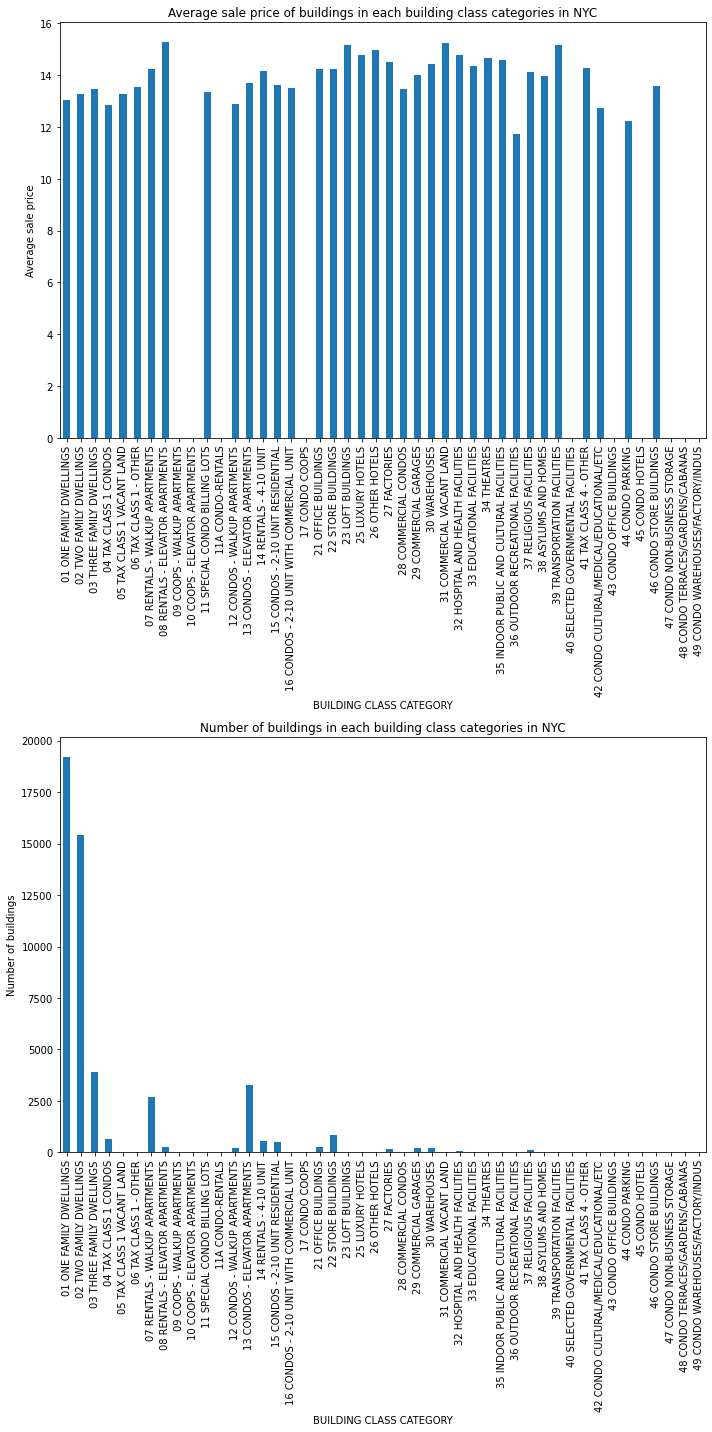

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(10,20), sharey=True)
# Average price by building class category
plt.subplot(211)
NYC.groupby('BUILDING CLASS CATEGORY').mean()['SALE PRICE'].plot(kind = 'bar')
plt.title('Average sale price of buildings in each building class categories in NYC')
plt.ylabel('Average sale price')

# number of buildings by building class category
plt.subplot(212)
NYC.groupby('BUILDING CLASS CATEGORY').size().plot(kind = 'bar')
plt.title('Number of buildings in each building class categories in NYC')
plt.ylabel('Number of buildings')

plt.tight_layout()
plt.show()

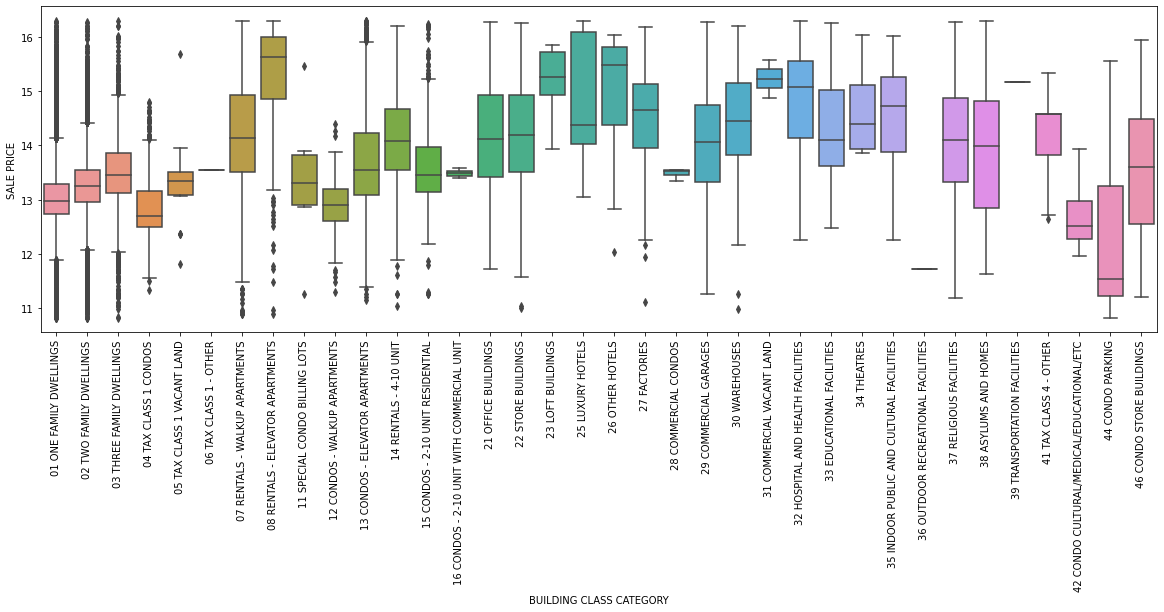

In [25]:
plt.figure(figsize=(20,6))
order = sorted(NYC['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x=NYC['BUILDING CLASS CATEGORY'], y = NYC['SALE PRICE'], data=NYC, order=order)
plt.xticks(rotation = 90)
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

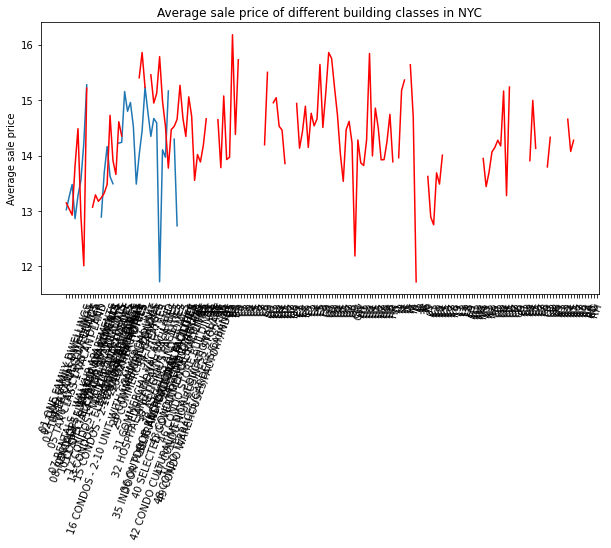

In [29]:
plt.figure(figsize=(10,5))
plt.plot(NYC.groupby('BUILDING CLASS CATEGORY').mean()['SALE PRICE'])
plt.title('Average sale price of different building classes in NYC')
plt.ylabel('Average sale price')
plt.xticks(rotation = 70)

plt.plot(NYC.groupby('BUILDING CLASS AT TIME OF SALE').mean()['SALE PRICE'],color='r')
plt.title('Average sale price of different building classes in NYC')
plt.ylabel('Average sale price')
plt.xticks(rotation = 70)

####Tax calss as of FINAL ROLL 18/19 vs Tax class at Time of Sale

**Description**

Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.

• Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two
attached apartments), vacant land that is zoned for residential use, and most
condominiums that are not more than three stories.

• Class 2: Includes all other property that is primarily residential, such as
cooperatives and condominiums.

• Class 3: Includes property with equipment owned by a gas, telephone or electric company.

• Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.

**Notice that here we will select tax class at time of sale since it reveals the newest information about the sold property**

In [ ]:
NYC['TAX CLASS AT TIME OF SALE'].value_counts()

1    39222
2     7517
4     2150
Name: TAX CLASS AT TIME OF SALE, dtype: int64

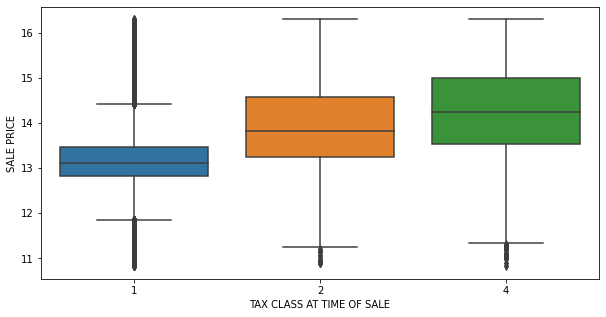

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=NYC['TAX CLASS AT TIME OF SALE'], y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

####Block and Lot

**Description**
- A Tax Block is a sub-division of the borough on which real properties are located.
The Department of Finance uses a Borough-Block-Lot classification to label all real
property in the City. “Whereas” addresses describe the street location of a property, the
block and lot distinguishes one unit of real property from another, such as the different
condominiums in a single building. Also, block and lots are not subject to name changes
based on which side of the parcel the building puts its entrance on. 
- A tax Lot is a subdivision of a Tax Block and represents the property unique location.

**Notice that here we will drop block and lot since they are unique for each property, they are irrevalent features for this project**

####Building Class As of Finall Roll 18/19 vs Building Class At Time of Sale

**Description:**
The Building Classification is used to describe a property’s constructive use. 

**Notice that here we will select building class at time of sale since it reveals the newest information about the sold property**

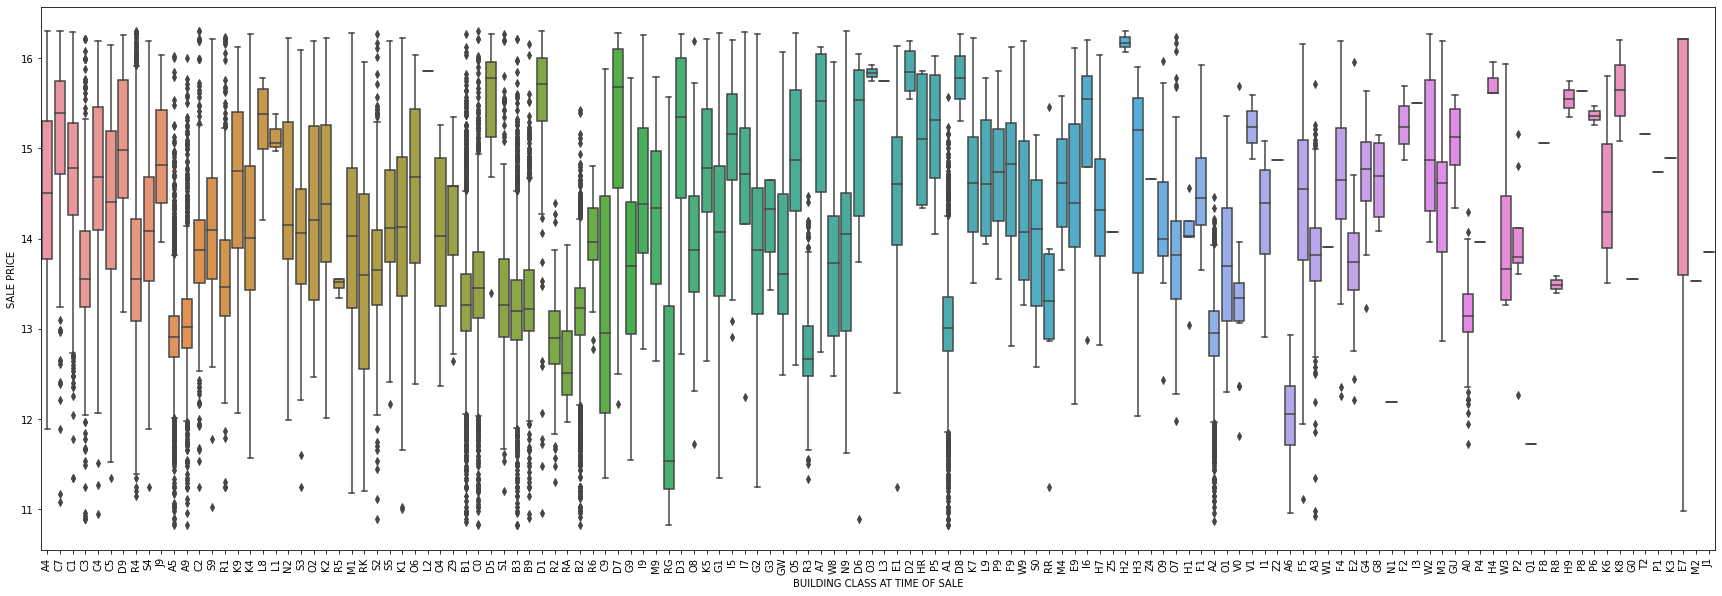

In [ ]:
plt.figure(figsize=(30,10))
order = NYC['BUILDING CLASS AT TIME OF SALE'].unique()
sns.boxplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=NYC, order = order)
plt.xticks(rotation=90)
plt.show()

####Address, Apartment Number and Zip Code 

**Notice that here we will drop Address, Apartment Number and Zip Code since they are unique for each property, they are irrevalent features for this project**

####Year Built

Text(0.5, 0, 'Year Built')

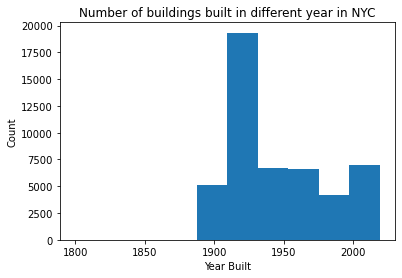

In [ ]:
plt.hist(NYC['YEAR BUILT'])
plt.title('Number of buildings built in different year in NYC')
plt.ylabel('Count')
plt.xlabel("Year Built")

Text(0, 0.5, 'Average or Median sale price')

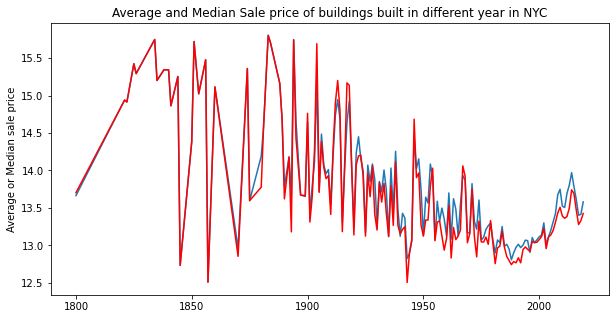

In [30]:
plt.figure(figsize=(10,5))
plt.plot(NYC.groupby('YEAR BUILT').mean()['SALE PRICE'])
plt.plot(NYC.groupby('YEAR BUILT').median()['SALE PRICE'],color='r')
plt.title('Average and Median Sale price of buildings built in different year in NYC')
plt.ylabel('Average or Median sale price')

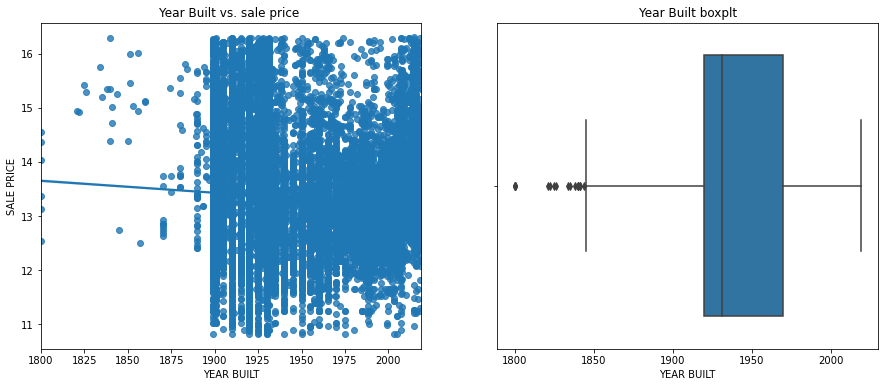

In [ ]:
# Year Built
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.regplot(x='YEAR BUILT', y='SALE PRICE',data=NYC)
plt.title('Year Built vs. sale price ')
plt.subplot(1,2,2)
sns.boxplot(x= 'YEAR BUILT', data=NYC)
plt.title('Year Built boxplt')
plt.show()

####Residential Units, Commercial Units and Total Units

**Description**


- Residential Units is the number of residential units the property has
- Comercial Units is the number of commercial units the property has
- Total Units is the sum of residential and  commercial units the property has


In [ ]:
NYC['RESIDENTIAL UNITS'].max()

312.0

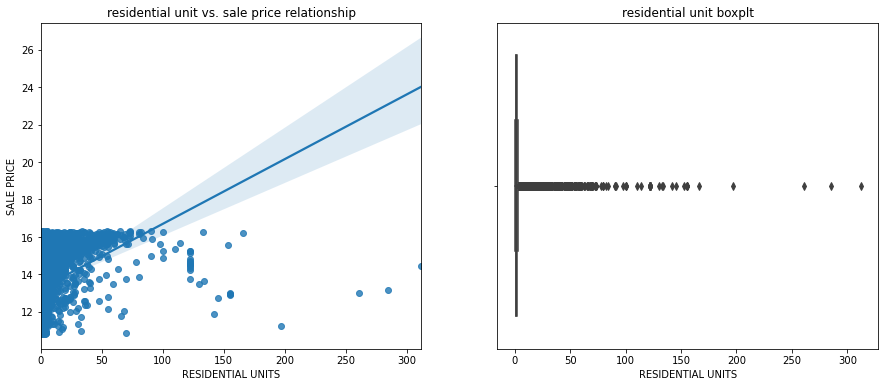

Text(0, 0.5, 'Frequency')

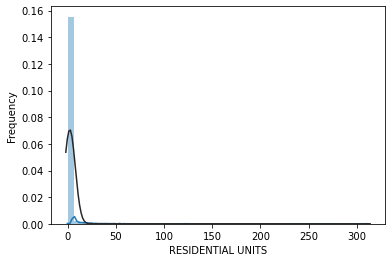

In [ ]:
# residential_units
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='RESIDENTIAL UNITS', y='SALE PRICE',data=NYC)
plt.title('residential unit vs. sale price relationship')
plt.subplot(1,2,2)
sns.boxplot(x='RESIDENTIAL UNITS', data=NYC)
plt.title('residential unit boxplt')
plt.show()

#density plot
sns.distplot(NYC['RESIDENTIAL UNITS'],fit = stats.norm)
plt.ylabel('Frequency')

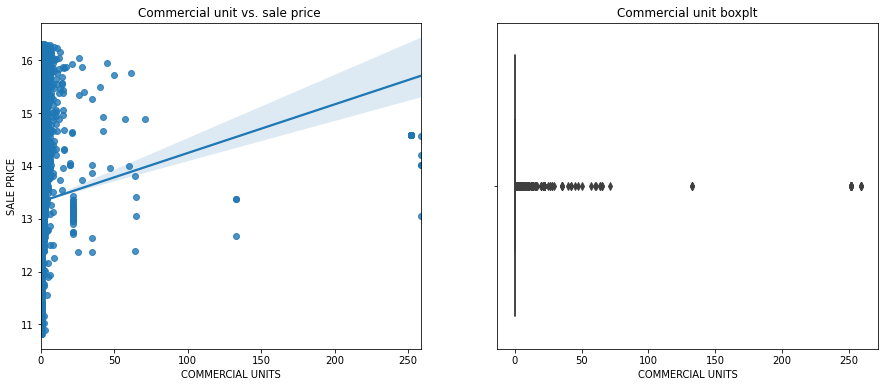

/Users/fanfan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Frequency')

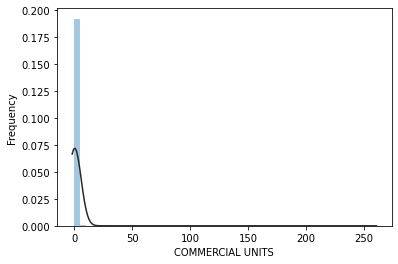

In [ ]:
# commercial units
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='COMMERCIAL UNITS', y='SALE PRICE',data=NYC)
plt.title('Commercial unit vs. sale price ')
plt.subplot(1,2,2)
sns.boxplot(x='COMMERCIAL UNITS', data=NYC)
plt.title('Commercial unit boxplt')
plt.show()

#density plot
sns.distplot(NYC['COMMERCIAL UNITS'],fit = stats.norm)
plt.ylabel('Frequency')

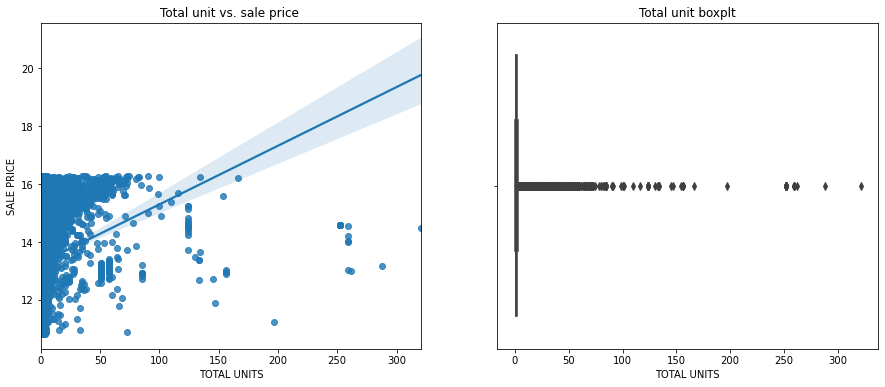

Text(0, 0.5, 'Frequency')

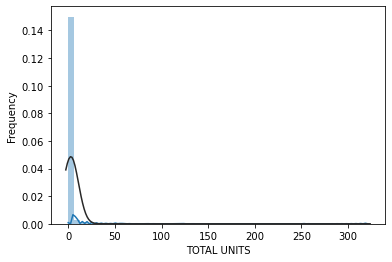

In [ ]:
# total units
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='TOTAL UNITS', y='SALE PRICE',data=NYC)
plt.title('Total unit vs. sale price ')
plt.subplot(1,2,2)
sns.boxplot(x='TOTAL UNITS', data=NYC)
plt.title('Total unit boxplt')
plt.show()

#density plot
sns.distplot(NYC['TOTAL UNITS'],fit = stats.norm)
plt.ylabel('Frequency')

####Land Square Feet and Gross Square Feet

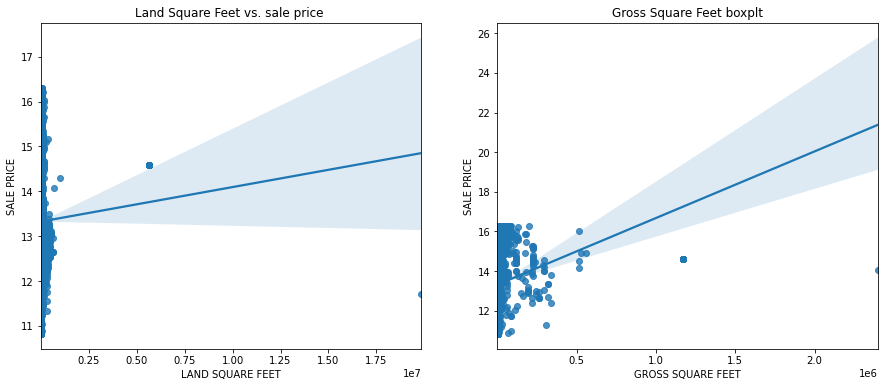

Text(0.5, 1.0, 'Gross Square Feet density plot')

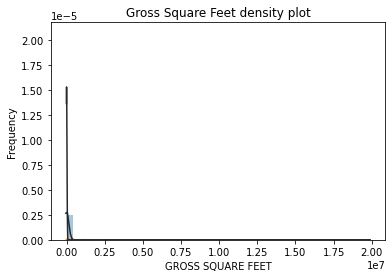

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE',data=NYC)
plt.title('Land Square Feet vs. sale price ')
plt.subplot(1,2,2)
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=NYC)
plt.title('Gross Square Feet boxplt')
plt.show()

#density plot
sns.distplot(NYC['LAND SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title('Land Square Feet density plot')
sns.distplot(NYC['GROSS SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title('Gross Square Feet density plot')

In [ ]:
NYC['LAND SQUARE FEET']=np.log(NYC['LAND SQUARE FEET'])

In [ ]:
NYC['GROSS SQUARE FEET']=np.log(NYC['GROSS SQUARE FEET'])

<Figure size 1080x432 with 0 Axes>

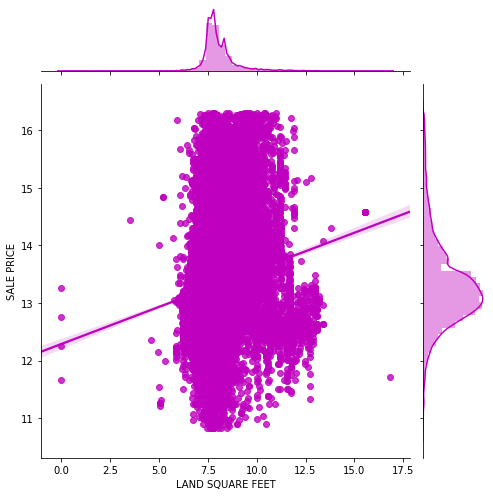

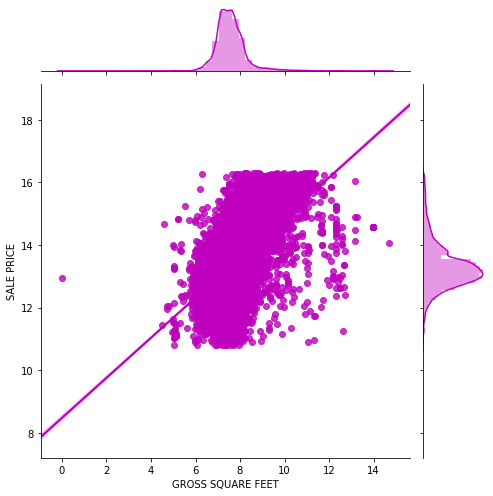

In [ ]:
plt.figure(figsize=(15,6));
a=sns.jointplot(x="LAND SQUARE FEET", y="SALE PRICE", data=NYC,
                  kind="reg", truncate=False,
                  color="m", height=7);
b=sns.jointplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=NYC,
                  kind="reg", truncate=False,
                  color="m", height=7);

### 3.3 Summary

Based on previous data visulization and analysis, we will drop these features: 

NEIGHBORHOOD, ADDRESS, APARTMENT NUMBER, BLOCK, LOT, ZIP CODE, BLOCK, TAX CLASS AS OF FINAL ROLL 18/19, 
BUILDING AS OF FINAL ROLL 18/19 

In [ ]:
NYC = NYC.drop(columns=["ADDRESS", "APARTMENT NUMBER", "LOT", "ZIP CODE", "BLOCK", 
                        "NEIGHBORHOOD", "TAX CLASS AS OF FINAL ROLL 18/19",
                        "BUILDING CLASS AS OF FINAL ROLL 18/19"])

#4 Feature Engineering

##4.1 Classification

Base on the scatter plots of **Commercial Units vs Sale Price** and **Residential Units vs. Sale Price**, the patten is opaque and there are lots of 0s, 1s in each plot. Hence we will classify it under the following criteria.

In [ ]:
# Type A: Commercial Units > 10
NYC.loc[NYC['COMMERCIAL UNITS']>10,'UNIT CATEGORY'] = 'A' ## commericial >10 
# Type B: Commercial Units <= 10
NYC.loc[(NYC['COMMERCIAL UNITS']>0)&(NYC['COMMERCIAL UNITS']<=10),'UNIT CATEGORY'] = 'B'
# Type C: Commercial Units = 0 and Residential Units = 1
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']==1),'UNIT CATEGORY'] = 'C' 
# Type D: Commercial Units = 0 and Residential Units <10
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']>1)&(NYC['RESIDENTIAL UNITS']<10),'UNIT CATEGORY'] = 'D' 
# Type D: Commercial Units = 0 and Residential Units >= 10
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']>=10),'UNIT CATEGORY'] = 'E'
# Type E: Commercial Units = 0 and Residential Units = 0
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']==0),'UNIT CATEGORY'] = 'F'
NYC['UNIT CATEGORY'] = NYC['UNIT CATEGORY'].astype('category')

Text(0.5, 1.0, 'Unit category vs. Sale Price')

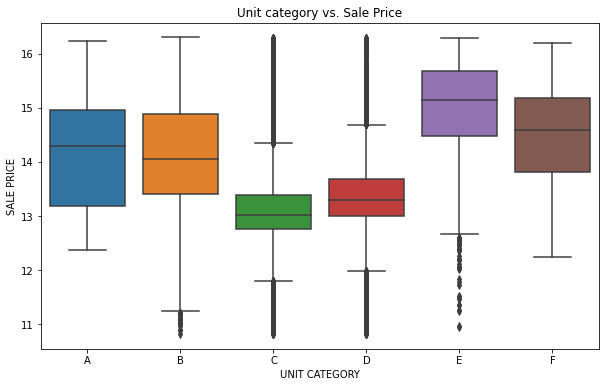

In [ ]:
# Visualization
plt.figure(figsize=(10,6))
sns.boxplot(x='UNIT CATEGORY', y='SALE PRICE',data=NYC)
plt.title('Unit category vs. Sale Price')

Now we will use UNIT CATEGORY for further analysis.

In [ ]:
NYC=NYC.drop(['COMMERCIAL UNITS', 'RESIDENTIAL UNITS', 
              'TOTAL UNITS','BUILDING CLASS AT TIME OF SALE'],axis=1)

##4.2 Categorical features: One-hot encoding

In [ ]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48889 entries, 1 to 167714
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BOROUGH                    48889 non-null  category
 1   BUILDING CLASS CATEGORY    48889 non-null  category
 2   LAND SQUARE FEET           48889 non-null  float64 
 3   GROSS SQUARE FEET          48889 non-null  float64 
 4   YEAR BUILT                 48889 non-null  float64 
 5   TAX CLASS AT TIME OF SALE  48889 non-null  category
 6   SALE PRICE                 48889 non-null  float64 
 7   UNIT CATEGORY              48889 non-null  category
dtypes: category(4), float64(4)
memory usage: 3.3 MB


In [ ]:

categoricals= ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE',
               'UNIT CATEGORY']
one_hot_encoded = pd.get_dummies(NYC[categoricals])
NYC = NYC.drop(categoricals,axis = 1)
NYC_new = NYC.join(one_hot_encoded)
NYC_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48889 entries, 1 to 167714
Data columns (total 64 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   LAND SQUARE FEET                                                    48889 non-null  float64
 1   GROSS SQUARE FEET                                                   48889 non-null  float64
 2   YEAR BUILT                                                          48889 non-null  float64
 3   SALE PRICE                                                          48889 non-null  float64
 4   BOROUGH_1                                                           48889 non-null  uint8  
 5   BOROUGH_2                                                           48889 non-null  uint8  
 6   BOROUGH_3                                                           48889 non-null  uint8  
 7   BOROUGH_4   

##4.3 Numerical features transformation

Text(0.5, 1.0, 'log(LAND SQUARE FEET) density plot')

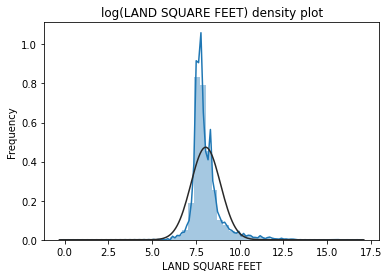

In [ ]:
#density plot
sns.distplot(NYC_new['LAND SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title("log(LAND SQUARE FEET) density plot")

Text(0.5, 1.0, 'log(GROSS SQUARE FEET) density plot')

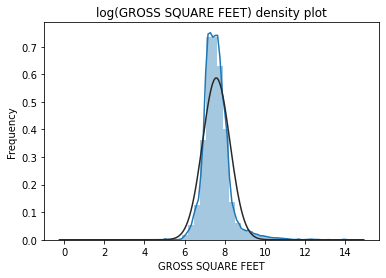

In [ ]:
#density plot
sns.distplot(NYC_new['GROSS SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title("log(GROSS SQUARE FEET) density plot")

#5 Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X = NYC_new.drop('SALE PRICE', axis = 1)
y = NYC_new['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

##5.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

MSE: 0.2840680915234724
RMSE: 0.5329803856836314
R-square 0.5301205465468595


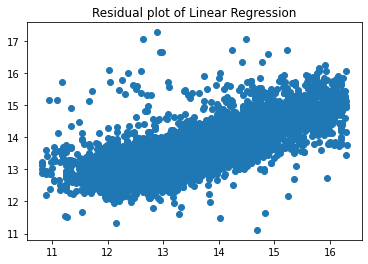

In [ ]:
pred_linear = lin_reg.predict(X_test)
plt.scatter(y_test, pred_linear)
plt.title('Residual plot of Linear Regression')
print('MSE:', metrics.mean_squared_error(y_test, pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_linear)))
print('R-square', metrics.r2_score(y_test, pred_linear))

##5.2 Robust Regression

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Test set evaluation:
_____________________________________
MAE: 0.38198050236588404
MSE: 0.3074741077690901
RMSE: 0.5545034785906128
R2 Square 0.49140445540820565
Train set evaluation:
_____________________________________
MAE: 0.3837381811890382
MSE: 0.31067708780196923
RMSE: 0.5573841474261438
R2 Square 0.4839591663970668


Text(0.5, 1.0, 'Residual plot of Robust Regression')

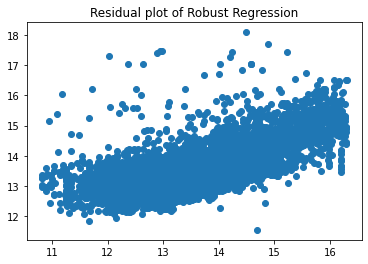

In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(max_trials=1000)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

plt.scatter(y_test, test_pred)
plt.title('Residual plot of Robust Regression')

##5.3 LASSO Regression

MAE: 0.47680440301624066
MSE: 0.4295943726142735
RMSE: 0.6554344914743757
R-square 0.28940428357170744


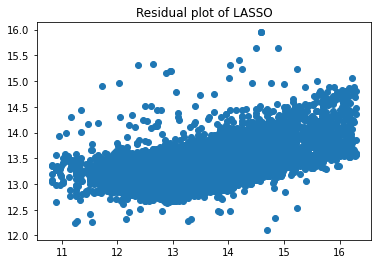

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg_predict = lasso_reg.predict(X_test)

plt.scatter(y_test, lasso_reg_predict)
plt.title('Residual plot of LASSO')
print('MAE:', metrics.mean_absolute_error(y_test, lasso_reg_predict))
print('MSE:', metrics.mean_squared_error(y_test, lasso_reg_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_reg_predict)))
print('R-square', metrics.r2_score(y_test, lasso_reg_predict))

##5.4 Ridge Regression

MAE: 0.3709401123414693
MSE: 0.283987468490072
RMSE: 0.532904746169587
R-square 0.5302539057941678


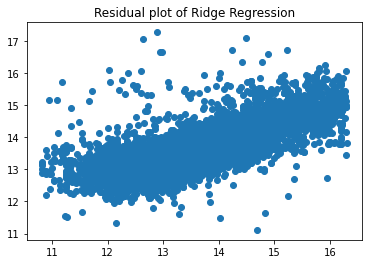

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg_predict = ridge_reg.predict(X_test)

plt.scatter(y_test, ridge_reg_predict)
plt.title('Residual plot of Ridge Regression')
print('MAE:', metrics.mean_absolute_error(y_test, ridge_reg_predict))
print('MSE:', metrics.mean_squared_error(y_test, ridge_reg_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_reg_predict)))
print('R-square', metrics.r2_score(y_test, ridge_reg_predict))

## 5.5 Elastic Net

MAE: 0.46945353780412824
MSE: 0.4179935181270587
RMSE: 0.646524182167271
R-square 0.3085933559409689


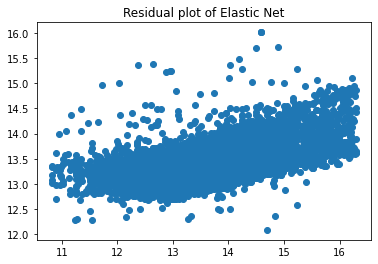

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)
elastic_predict = model.predict(X_test)

plt.scatter(y_test, elastic_predict)
plt.title('Residual plot of Elastic Net')
print('MAE:', metrics.mean_absolute_error(y_test, elastic_predict))
print('MSE:', metrics.mean_squared_error(y_test, elastic_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_predict)))
print('R-square', metrics.r2_score(y_test, elastic_predict))


# 6 Feature Importance of the Best Model: Ridge

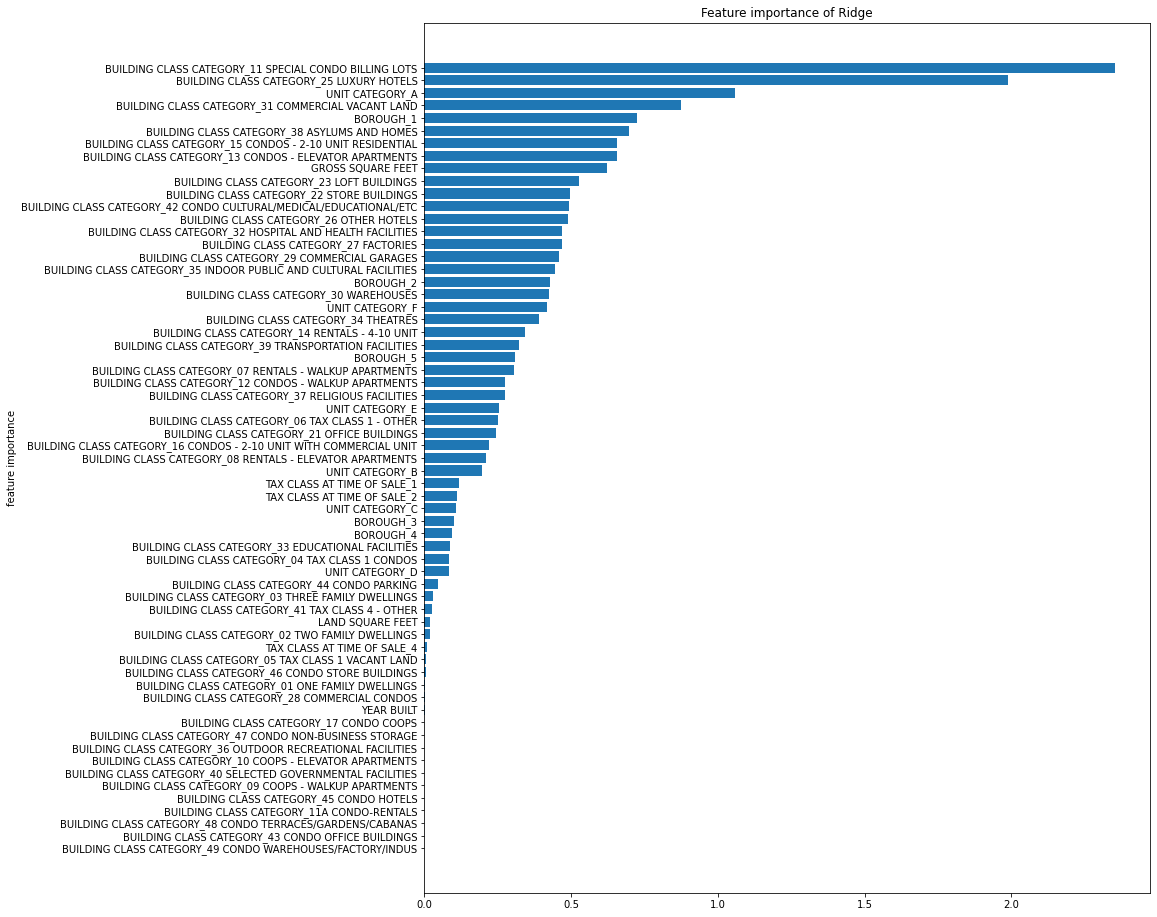

In [ ]:
ridge_result = pd.DataFrame({'feature': X_train.columns, 'importance': abs(ridge_reg.coef_)})
ridge_result_sorted = ridge_result.sort_values(by = 'importance', ascending = True)

fig, ax1 = plt.subplots(figsize = (13,16))
ax1.barh(ridge_result_sorted['feature'], ridge_result_sorted['importance'])
ax1.set_ylabel('feature importance')
ax1.set_title('Feature importance of Ridge')
plt.show()